In [1]:
# this is the second version of seismosafe nepal aka Richter’s Predictor
# goal is to increase f1-score to 80+, also other metrics 

# Step 1: Data understanding and Exploration 

In [2]:
# imports
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# load and examine dataset
train_values = pd.read_csv('../data/raw/train_values.csv') #contains features
train_labels = pd.read_csv('../data/raw/train_labels.csv') # contains target of features connected via id 
test_values = pd.read_csv('../data/raw/test_values.csv') # test values

In [4]:
# merged features and target 
train = pd.merge(train_values,train_labels,on='building_id')

In [5]:
train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [7]:
train.shape

(260601, 40)

In [8]:
# checking datatypes of all features
train.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

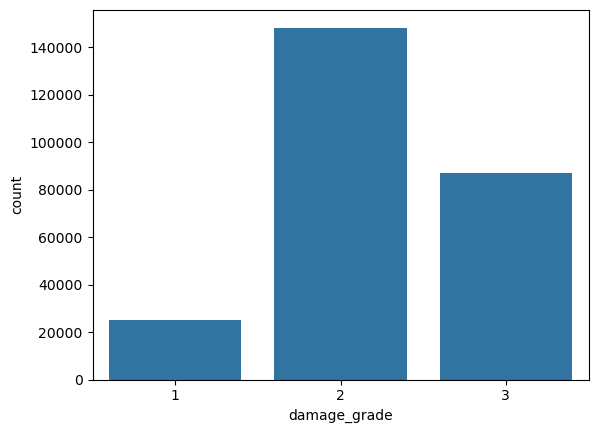

In [9]:
# target variable analysis 
# ccount frequency of damage_grade 

sns.countplot(x ='damage_grade',data=train)
plt.show()

# 2 seems dominant 
# data is imbalance , we will correct it in feature enginnering section 

In [10]:
# measure of central tendency 
train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


# Step 2 : Data Cleaning

seeing above statistics we can detect outliers like
- `building_age` - 990 max 
- `count_floors` - avg - 2 , max -9 

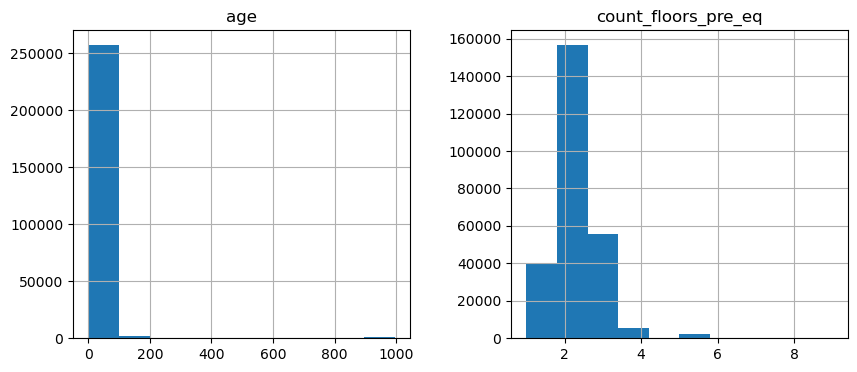

In [11]:
train[['age', 'count_floors_pre_eq']].hist(figsize=(10, 4))
plt.show()
# see ther are some etreme outliers 

In [12]:
# removing outliers  - taking threshold 600 for building age and 4 for floor counts
conditions = (
    (train['age'] <= 60) & (train['age'] >= 0) &
    (train['count_floors_pre_eq'] <= 5) & (train['count_floors_pre_eq'] >= 1) 
)
train = train[conditions]

In [13]:
train.shape

(247928, 40)

In [14]:
# feature analysis
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [15]:
train.sample(3)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
9075,477471,17,596,8812,3,15,16,6,t,r,...,0,0,0,0,0,0,0,0,0,3
50301,974264,6,1060,787,2,15,6,4,t,r,...,0,0,0,0,0,0,0,0,0,3
242596,893105,6,99,1682,2,25,10,6,t,r,...,0,0,0,0,0,0,0,0,0,2


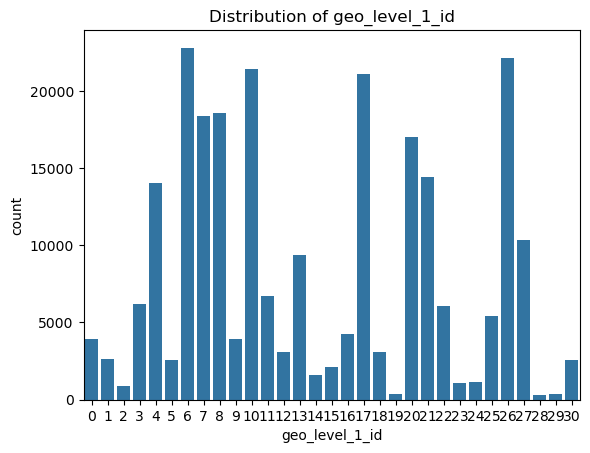

In [16]:
sns.countplot(x='geo_level_1_id', data=train)
plt.title('Distribution of geo_level_1_id')
plt.show()


In [17]:
# Data Validation 

# checkingif the targets are consistent

print("Unique damage grades:",train['damage_grade'].unique())
assert train['damage_grade'].isin([1,2,3]).all()

Unique damage grades: [3 2 1]


In [18]:
# checking if geolevels are negative 
geo_cols = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
print(train[geo_cols].min())
assert (train[geo_cols] >= 0).all().all()


geo_level_1_id    0
geo_level_2_id    0
geo_level_3_id    0
dtype: int64


In [19]:
# CHECKIGN if data is between 1-5 
assert train['count_floors_pre_eq'].between(1, 5).all()
# all data are consitent

# Step 3: Exploratory Data Analysis 

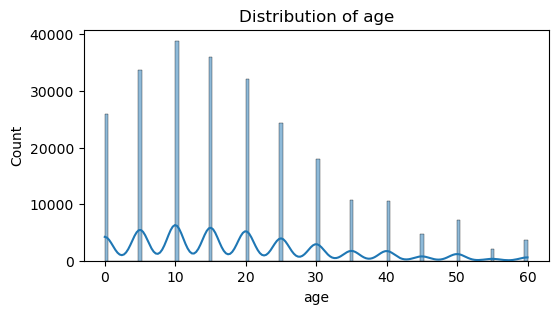

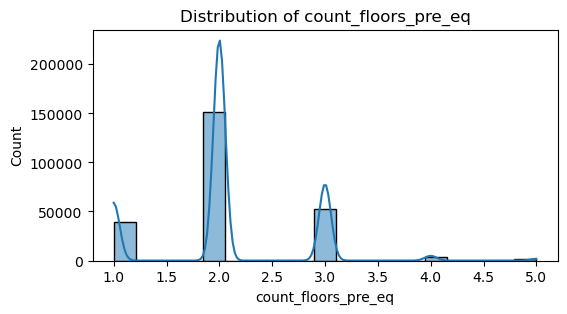

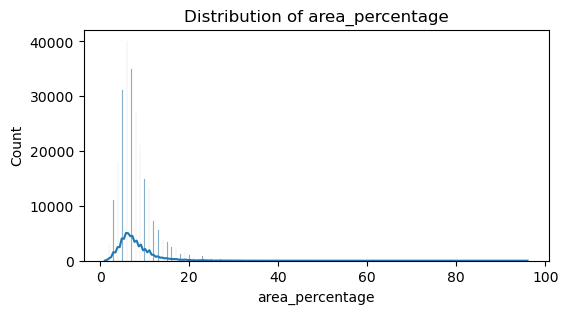

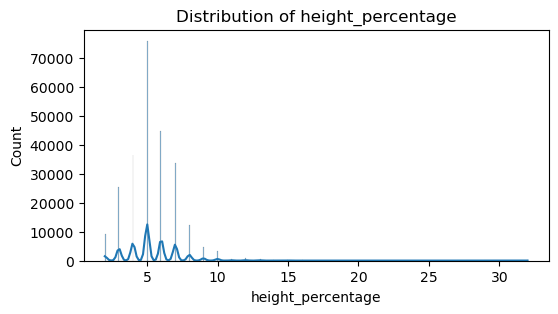

In [20]:
# univatiate analysis
num_features = ['age', 'count_floors_pre_eq', 'area_percentage', 'height_percentage']

for col in num_features:
    plt.figure(figsize=(6,3))
    sns.histplot(train[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

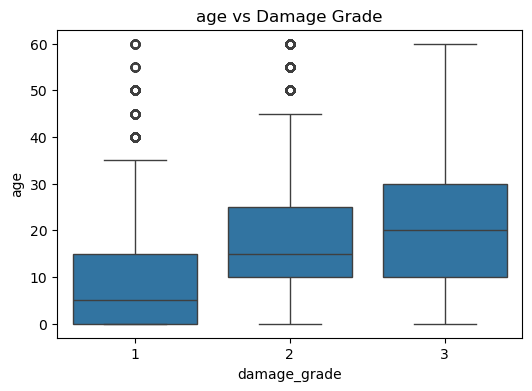

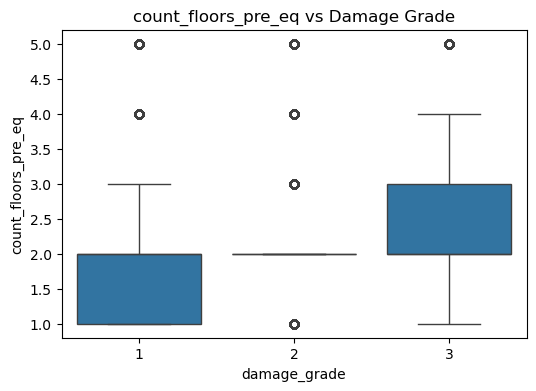

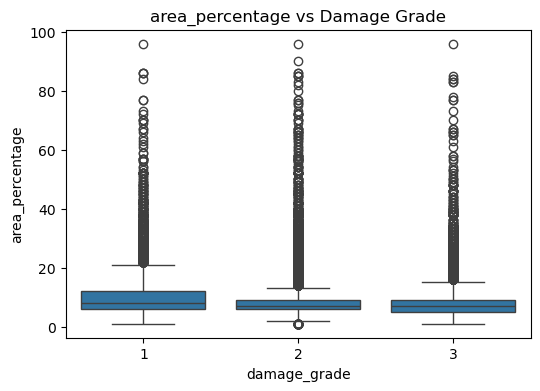

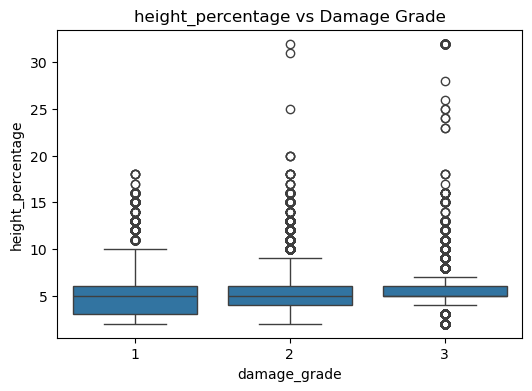

In [21]:
# bivariate analysis
# Numerical Features vs damage_grade 
num_features = ['age', 'count_floors_pre_eq', 'area_percentage', 'height_percentage']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='damage_grade',y=col,data=train)
    plt.title(f'{col} vs Damage Grade')
    plt.show()

# What we are looking for:
# Do older buildings have higher damage?
# Does higher building height or area relate to more damage

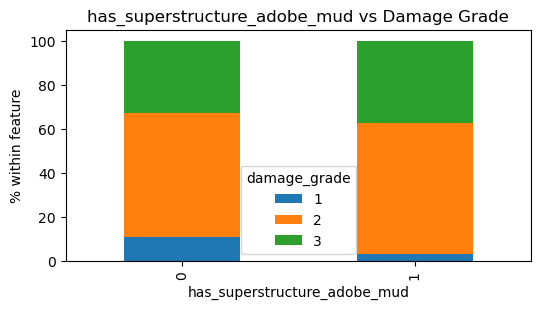

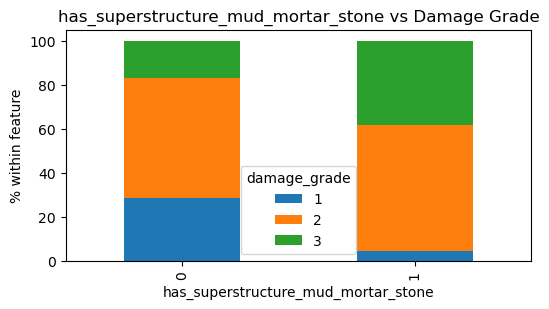

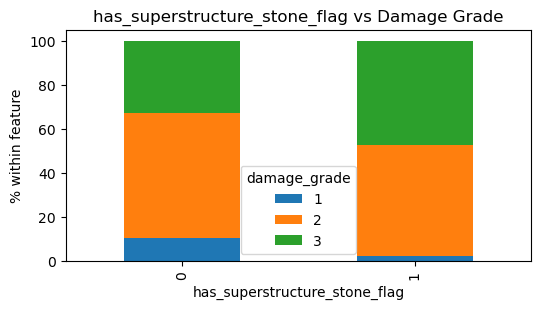

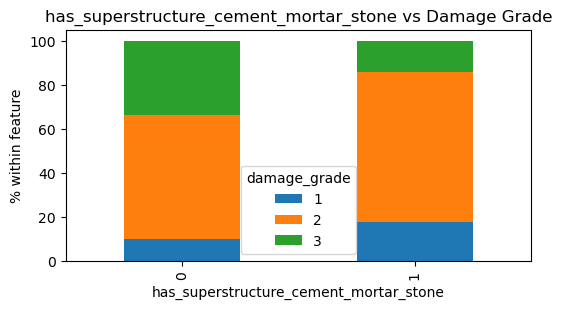

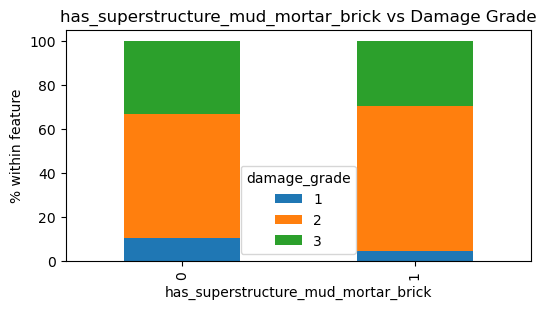

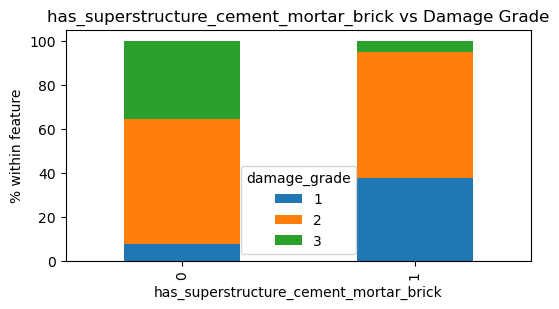

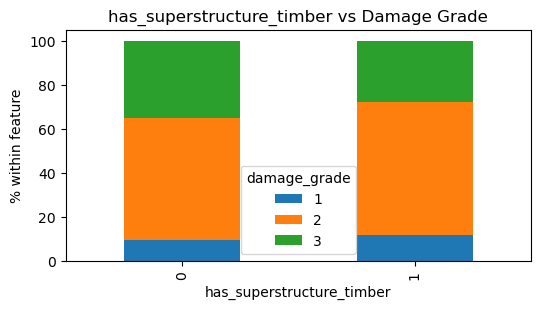

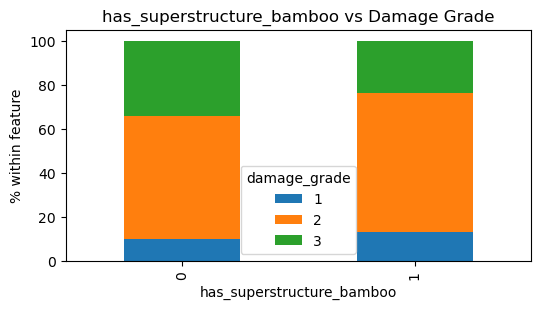

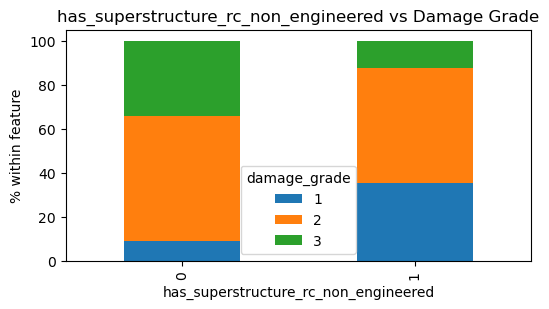

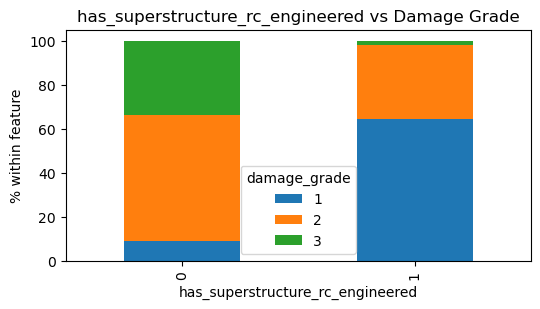

In [22]:
# finding realtion between binary columns and damge grade 
binary_cols = [col for col in train.columns if (
    col.startswith('has_') or col.startswith('has_secondary_use'))]

import pandas as pd

for col in binary_cols[:10]:  # show 10 at a time
    crosstab = pd.crosstab(train[col], train['damage_grade'], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True, figsize=(6, 3))
    plt.title(f'{col} vs Damage Grade')
    plt.ylabel('% within feature')
    plt.show()


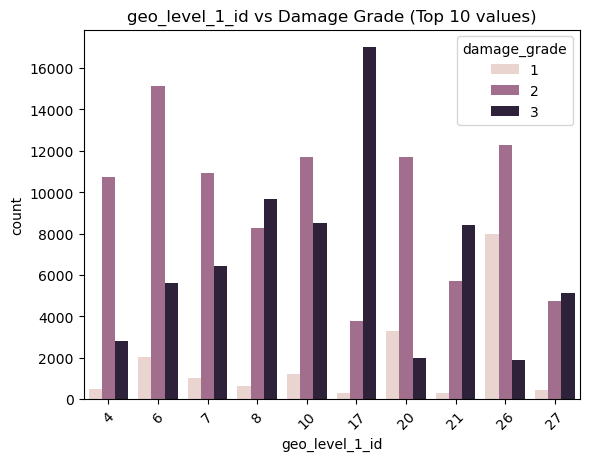

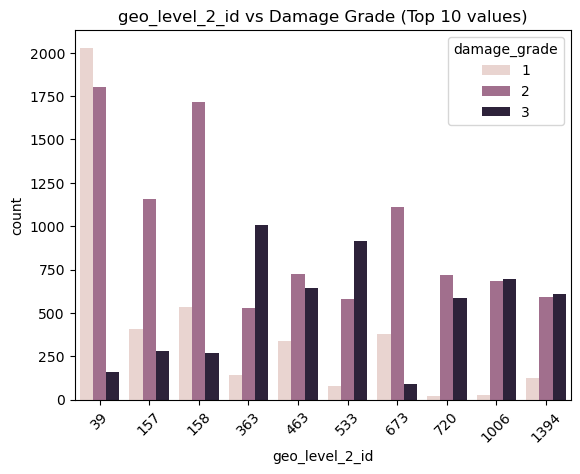

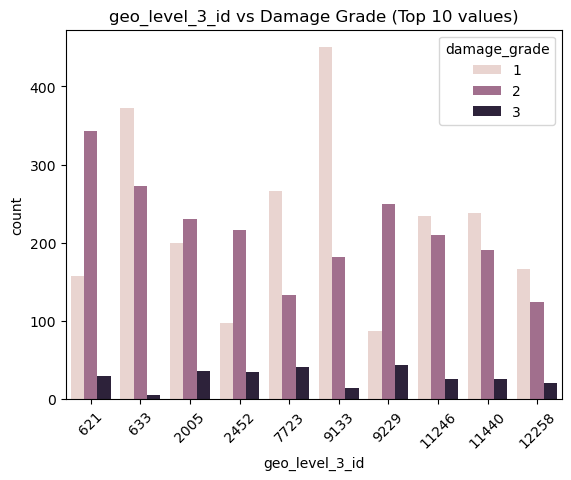

In [23]:
# finding categorical realtionship between damaggrade vs category 
cat_features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']

for col in cat_features:
    top_categories = train[col].value_counts().index[:10]
    temp_df = train[train[col].isin(top_categories)]
    sns.countplot(x=col, hue='damage_grade', data=temp_df)
    plt.title(f'{col} vs Damage Grade (Top 10 values)')
    plt.xticks(rotation=45)
    plt.show()


# Step 4 :Feature Enginnering 

In [27]:
import numpy as np
import pandas as pd

df = train.copy() 

df['age_group'] = pd.cut(df['age'], bins=[-1, 10, 30, 50, 1000], labels=['0-10', '11-30', '31-50', '50+'])

df['building_height_cat'] = pd.cut(df['count_floors_pre_eq'], bins=[0, 2, 5, 100], labels=['1-2', '3-5', '6+'])

df['area_height_ratio'] = df['area_percentage'] / (df['height_percentage'] + 1e-5)  # avoid div by zero

df['vulnerability_score'] = (
    df['age'] * 0.01 +
    df['count_floors_pre_eq'] * 0.1 +
    df['has_superstructure_adobe_mud'] * 0.3 +
    df['has_superstructure_mud_mortar_stone'] * 0.2
)

df['density_score'] = df['count_floors_pre_eq'] / (df['area_percentage'] + 1e-5)

df['material_risk'] = (
    df['has_superstructure_adobe_mud'] * 3 +
    df['has_superstructure_mud_mortar_stone'] * 2 +
    df['has_superstructure_cement_mortar_brick'] * 1
)

geo_risk = df.groupby('geo_level_1_id')['damage_grade'].mean().rename('geo_risk_score')
df = df.merge(geo_risk, on='geo_level_1_id', how='left')

df['is_high_risk_area'] = (df['geo_risk_score'] >= 2.5).astype(int)

df.fillna({'geo_risk_score': df['damage_grade'].mean()}, inplace=True)

# sanity check 
df[['age', 'age_group', 'count_floors_pre_eq', 'building_height_cat',
    'area_height_ratio', 'vulnerability_score', 'material_risk',
    'geo_risk_score', 'is_high_risk_area']].head()


,age,age_group,count_floors_pre_eq,building_height_cat,area_height_ratio,vulnerability_score,material_risk,geo_risk_score,is_high_risk_area
0,30,11-30,2,1-2,1.199998,1.0,5,2.155956,0
1,10,0-10,2,1-2,1.142856,0.5,2,2.484873,0
2,10,0-10,2,1-2,0.999998,0.5,2,2.560549,1
3,10,0-10,2,1-2,1.199998,0.5,2,2.001804,0
4,30,11-30,3,3-5,0.888888,0.9,3,2.331152,0


In [28]:
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_other,damage_grade,age_group,building_height_cat,area_height_ratio,vulnerability_score,density_score,material_risk,geo_risk_score,is_high_risk_area
0,802906,6,487,12198,2,30,6,5,t,r,...,0,3,11-30,1-2,1.199998,1.00,0.333333,5,2.155956,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,2,0-10,1-2,1.142856,0.50,0.250000,2,2.484873,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,3,0-10,1-2,0.999998,0.50,0.399999,2,2.560549,1
3,590882,22,418,10694,2,10,6,5,t,r,...,0,2,0-10,1-2,1.199998,0.50,0.333333,2,2.001804,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,3,11-30,3-5,0.888888,0.90,0.375000,3,2.331152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247923,688636,25,1335,1621,1,55,6,3,n,r,...,0,2,50+,1-2,1.999993,0.85,0.166666,2,2.051753,0
247924,669485,17,715,2060,2,0,6,5,t,r,...,0,3,0-10,1-2,1.199998,0.40,0.333333,2,2.793362,1
247925,602512,17,51,8163,3,55,6,7,t,r,...,0,3,50+,3-5,0.857142,1.05,0.499999,2,2.793362,1
247926,151409,26,39,1851,2,10,14,6,t,r,...,0,2,0-10,1-2,2.333329,0.30,0.142857,1,1.725322,0


# 